# Linear Regression with TensorFlow

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython import display

In [2]:
# Step 1: create data
x_input = np.linspace(-1, 1, 100)
y_input = x_input * 3 + np.random.randn(x_input.shape[0]) * 0.5

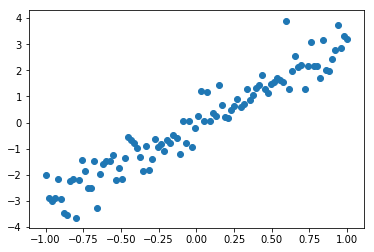

In [3]:
# visualize data
plt.scatter(x_input, y_input)
plt.show()

In [4]:
# Step 2: create placeholders for input X and label Y
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

In [5]:
# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name="weights")
b = tf.Variable(0.0, name="bias")

In [6]:
# Step 4: construct model to predict Y from X
Y_predicted = X * w + b

In [7]:
# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name="loss")

In [8]:
# Step 6: using gradient descent with learning rate to minimize loss function
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)


Final: weight = 3.0668673515319824, bias = -0.011949590407311916


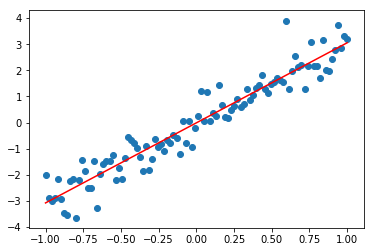

In [9]:
with tf.Session() as sess:  
    
    # Step 7: initialize variables, w and b
    sess.run(tf.global_variables_initializer())

    # Step 8: train the model
    for i in range(100): # run epochs
        for x, y in zip(x_input, y_input):
            # Session runs train_op to minimize loss
            sess.run(optimizer, feed_dict={X: x, Y: y})
        
        # print current weight and bias
        if i % 10 == 0:
            w_value, b_value = sess.run([w, b])
            # plot graph
            display.clear_output(wait=True)
            print("Epoch = {:2d} - weight = {}, bias = {}".format(i, w_value, b_value))
            plt.scatter(x_input, y_input)
            plt.plot(x_input, [i * w_value + b_value for i in x_input], 'r-')
            plt.show()
            
    # Step 9: output the values of w and b
    w_value, b_value = sess.run([w, b])

    # plot final graph
    display.clear_output()
    print("\nFinal: weight = {}, bias = {}".format(w_value, b_value))
    plt.scatter(x_input, y_input)
    plt.plot(x_input, [i * w_value + b_value for i in x_input], 'r-')
    plt.show()